# Pima Indians diabetes mellitus classification based on ML algorithms 
## (Data cleaning and visualization)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

There are 9 attributes with 768 instances. 

## Data cleaning

### Attributes

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

All attribute names are more or less self-explanatory, but their meaning is clarified below:
 - Pregnancies - number of times pregnant
 - Glucose - Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIIT)
 - BloodPressure - Diastolic Blood Pressure (mmHg)
 - SkinThickness - Triceps skin fold thickness (mm)
 - Insulin - 2-Hour Serum insulin ($\mu$ h/ml)
 - BMI - Body mass index ($bodyMass/Height^2$, mass in kg, height in m)
 - DiabetesPedigreeFunction - Diabetes pedigree function
 - Age - Age in years
 - Outcome - Binary value indicating non-diabetic (0) / diabetic (1)

### Data types and null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All values are numerical. Columns BMI and DiabetesPedigreeFunction are real numbers, and other columns contain whole numbers.

There are no null values.

### Monotonous variables

In [7]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

There are no monotonous variables. It was expected that columns with real-number values will have many unique values.

### Outliers

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We will look at boxplots of all of the attributes, with special care to those which have min/max values very far from 1st/3rd quartile respectively (all except outcome).

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

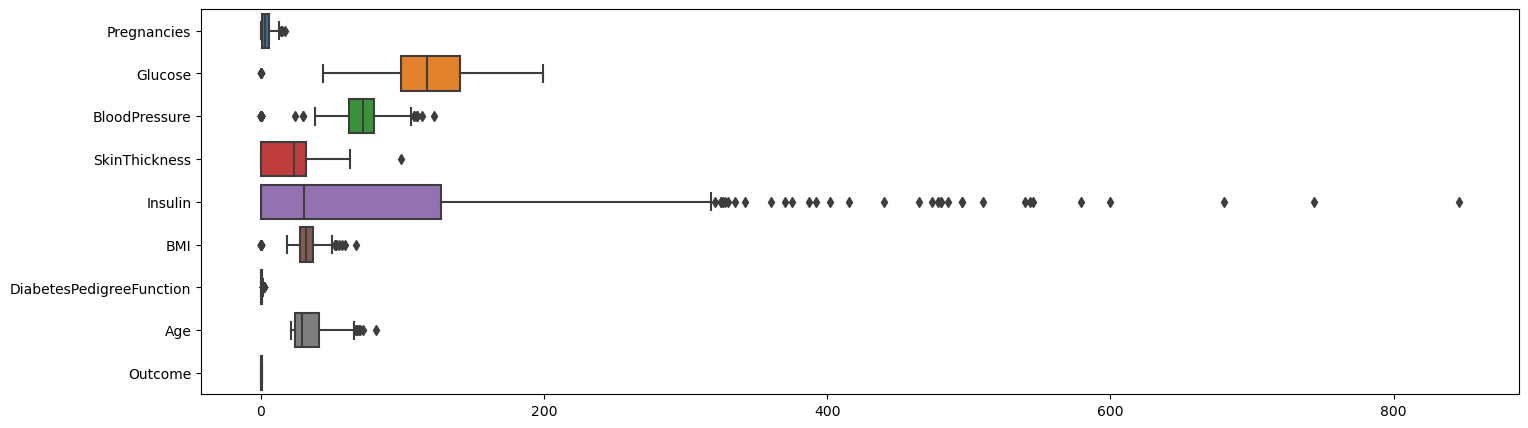

In [10]:
plt.figure(figsize=(17,5))
sns.boxplot(df, orient='h')
plt.show()

The outliers in Insulin column make it hard to see the other attributes, the DiabetesPedigreeFunction is on a much smaller scale, and Glucose on a larger scale than the rest - we will plot them separately.

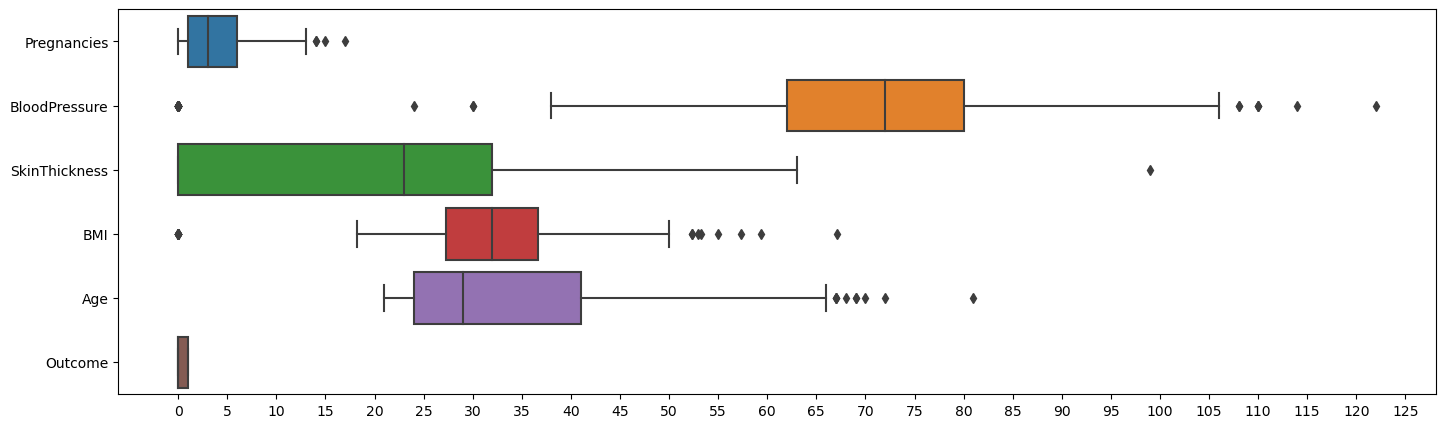

In [11]:
plt.figure(figsize=(17,5))
ticks = np.arange(0, 130, 5)
columns = df.columns
columns = columns.drop(['Insulin', 'DiabetesPedigreeFunction', 'Glucose'])
sns.boxplot(df[columns], orient='h')
plt.xticks(ticks)
plt.show()

Let's count some of the outliers

In [12]:
print("BMI == 0: ",df[df['BMI']==0].shape[0])

BMI == 0:  11


In [13]:
print("BP: 0:", df[df['BloodPressure']==0].shape[0])
print("BP: <35:", df[df['BloodPressure']<35].shape[0])

BP: 0: 35
BP: <35: 38


In [14]:
print("SkinThickness: 0:", df[df['SkinThickness']==0].shape[0])

SkinThickness: 0: 227


Number of outliers: 
- in Age (~6 instances over 65), 
- in BMI (11 values with 0, and ~10 values >50),
- in SkinThickness (one value ~ 100),
- in BloodPressure (35 0-values, 3 values <0,35>, 4 values > 108)
- in Pregnancies (3 values > 13)

Since the number of outliers is little, we could remove all of those instances, but we will just remove the instances where the values make no sense - BMI (0-values), BloodPressure (0-values).

Skin Thickness should not be 0, but there are 227 instances with 0-values. However, we will not remove them (there are too many to remove from the dataset).

In [15]:
df = df[df['BMI']!=0]
df = df[df['BloodPressure']!=0]

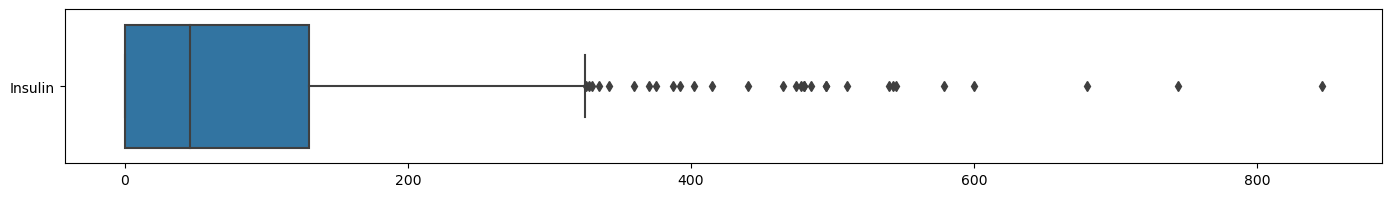

In [16]:
plt.figure(figsize=(17,2))
sns.boxplot(df[["Insulin"]], orient="h")
plt.show()

In [17]:
print("Insulin == 0: ",df[df['Insulin']==0].shape[0])

Insulin == 0:  336


Almost half of the instances have Insulin value of 0, which is inconsistent with the domain knowledge. However, we will not remove these values because there are there are too many to remove.

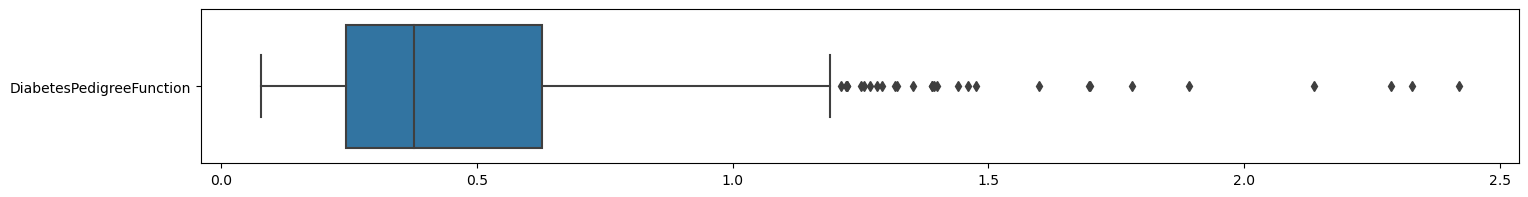

In [18]:
plt.figure(figsize=(17,2))
sns.boxplot(df[["DiabetesPedigreeFunction"]], orient="h")
plt.show()

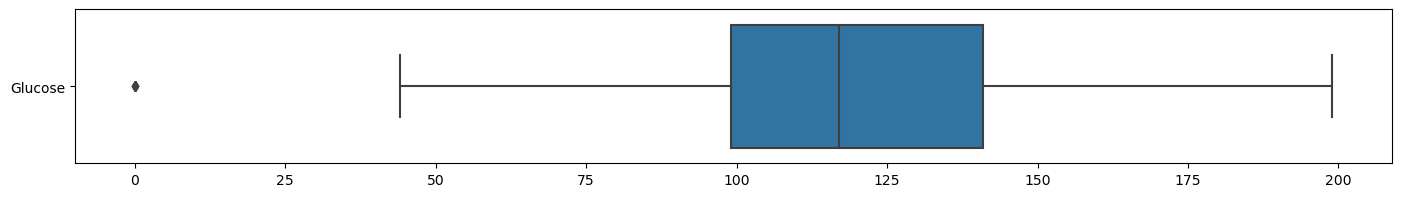

In [19]:
plt.figure(figsize=(17,2))
sns.boxplot(df[["Glucose"]], orient="h")
plt.show()

In [20]:
print("Glucose == 0: ",df[df['Glucose']==0].shape[0])

Glucose == 0:  5


5 instances have Glucose value of 0, which makes no sense, so we will remove them.

In [21]:
df = df[df['Glucose']!=0]

In [22]:
df.shape

(724, 9)

We have lost 44 instances, but our dataset is now cleaner.

In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Let's save the dataset:

In [24]:
df.to_csv('diabetes_clean.csv', index=False)

## Data visualization

Now we can see boxplots without outliers:

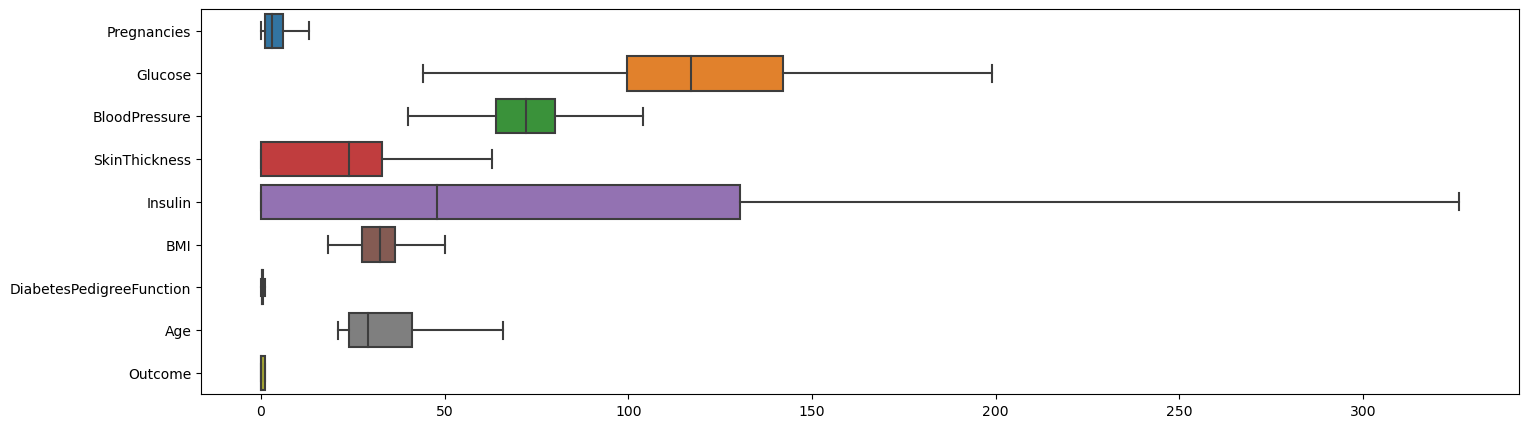

In [25]:
plt.figure(figsize=(17,5))
sns.boxplot(df, orient='h', showfliers=False)
plt.show()

#### Is the dataset balanced?

In [26]:
import seaborn as sns

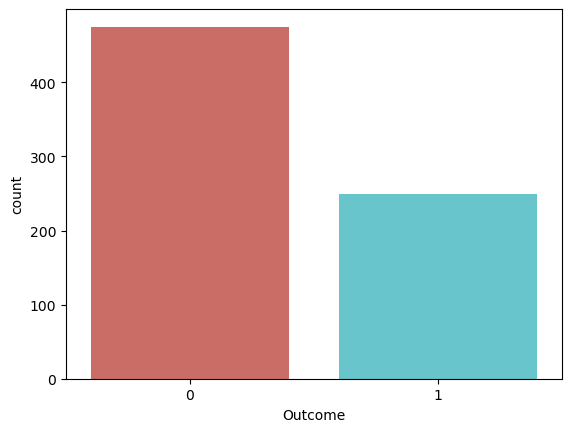

In [27]:
sns.countplot(x='Outcome', data=df, palette='hls')
plt.show()

The dataset is unbalanced, with around twice as many 0-outcome than 1-outcome cases.

#### Correlation
Let's plot the correlation matrix to see which values are correlated

<Axes: >

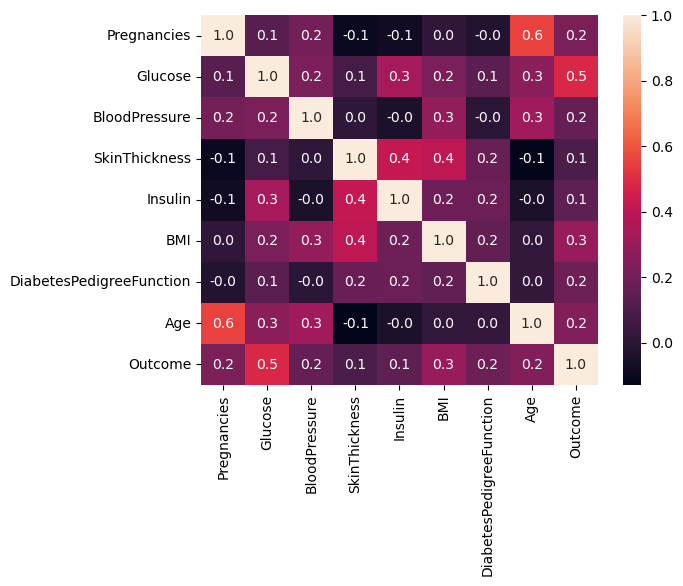

In [28]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".1f")

Only two pairs of features are significantly correlated: Age and Pregnancies (which is also intuitively correlated), and Outcome and Glucose.

The correlations are not high enough to remove any of the attributes. It would likely imply a significant loss of information. 

#### Distributions
Finally, let's see a scatterplot matrix

C:\Users\Ana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


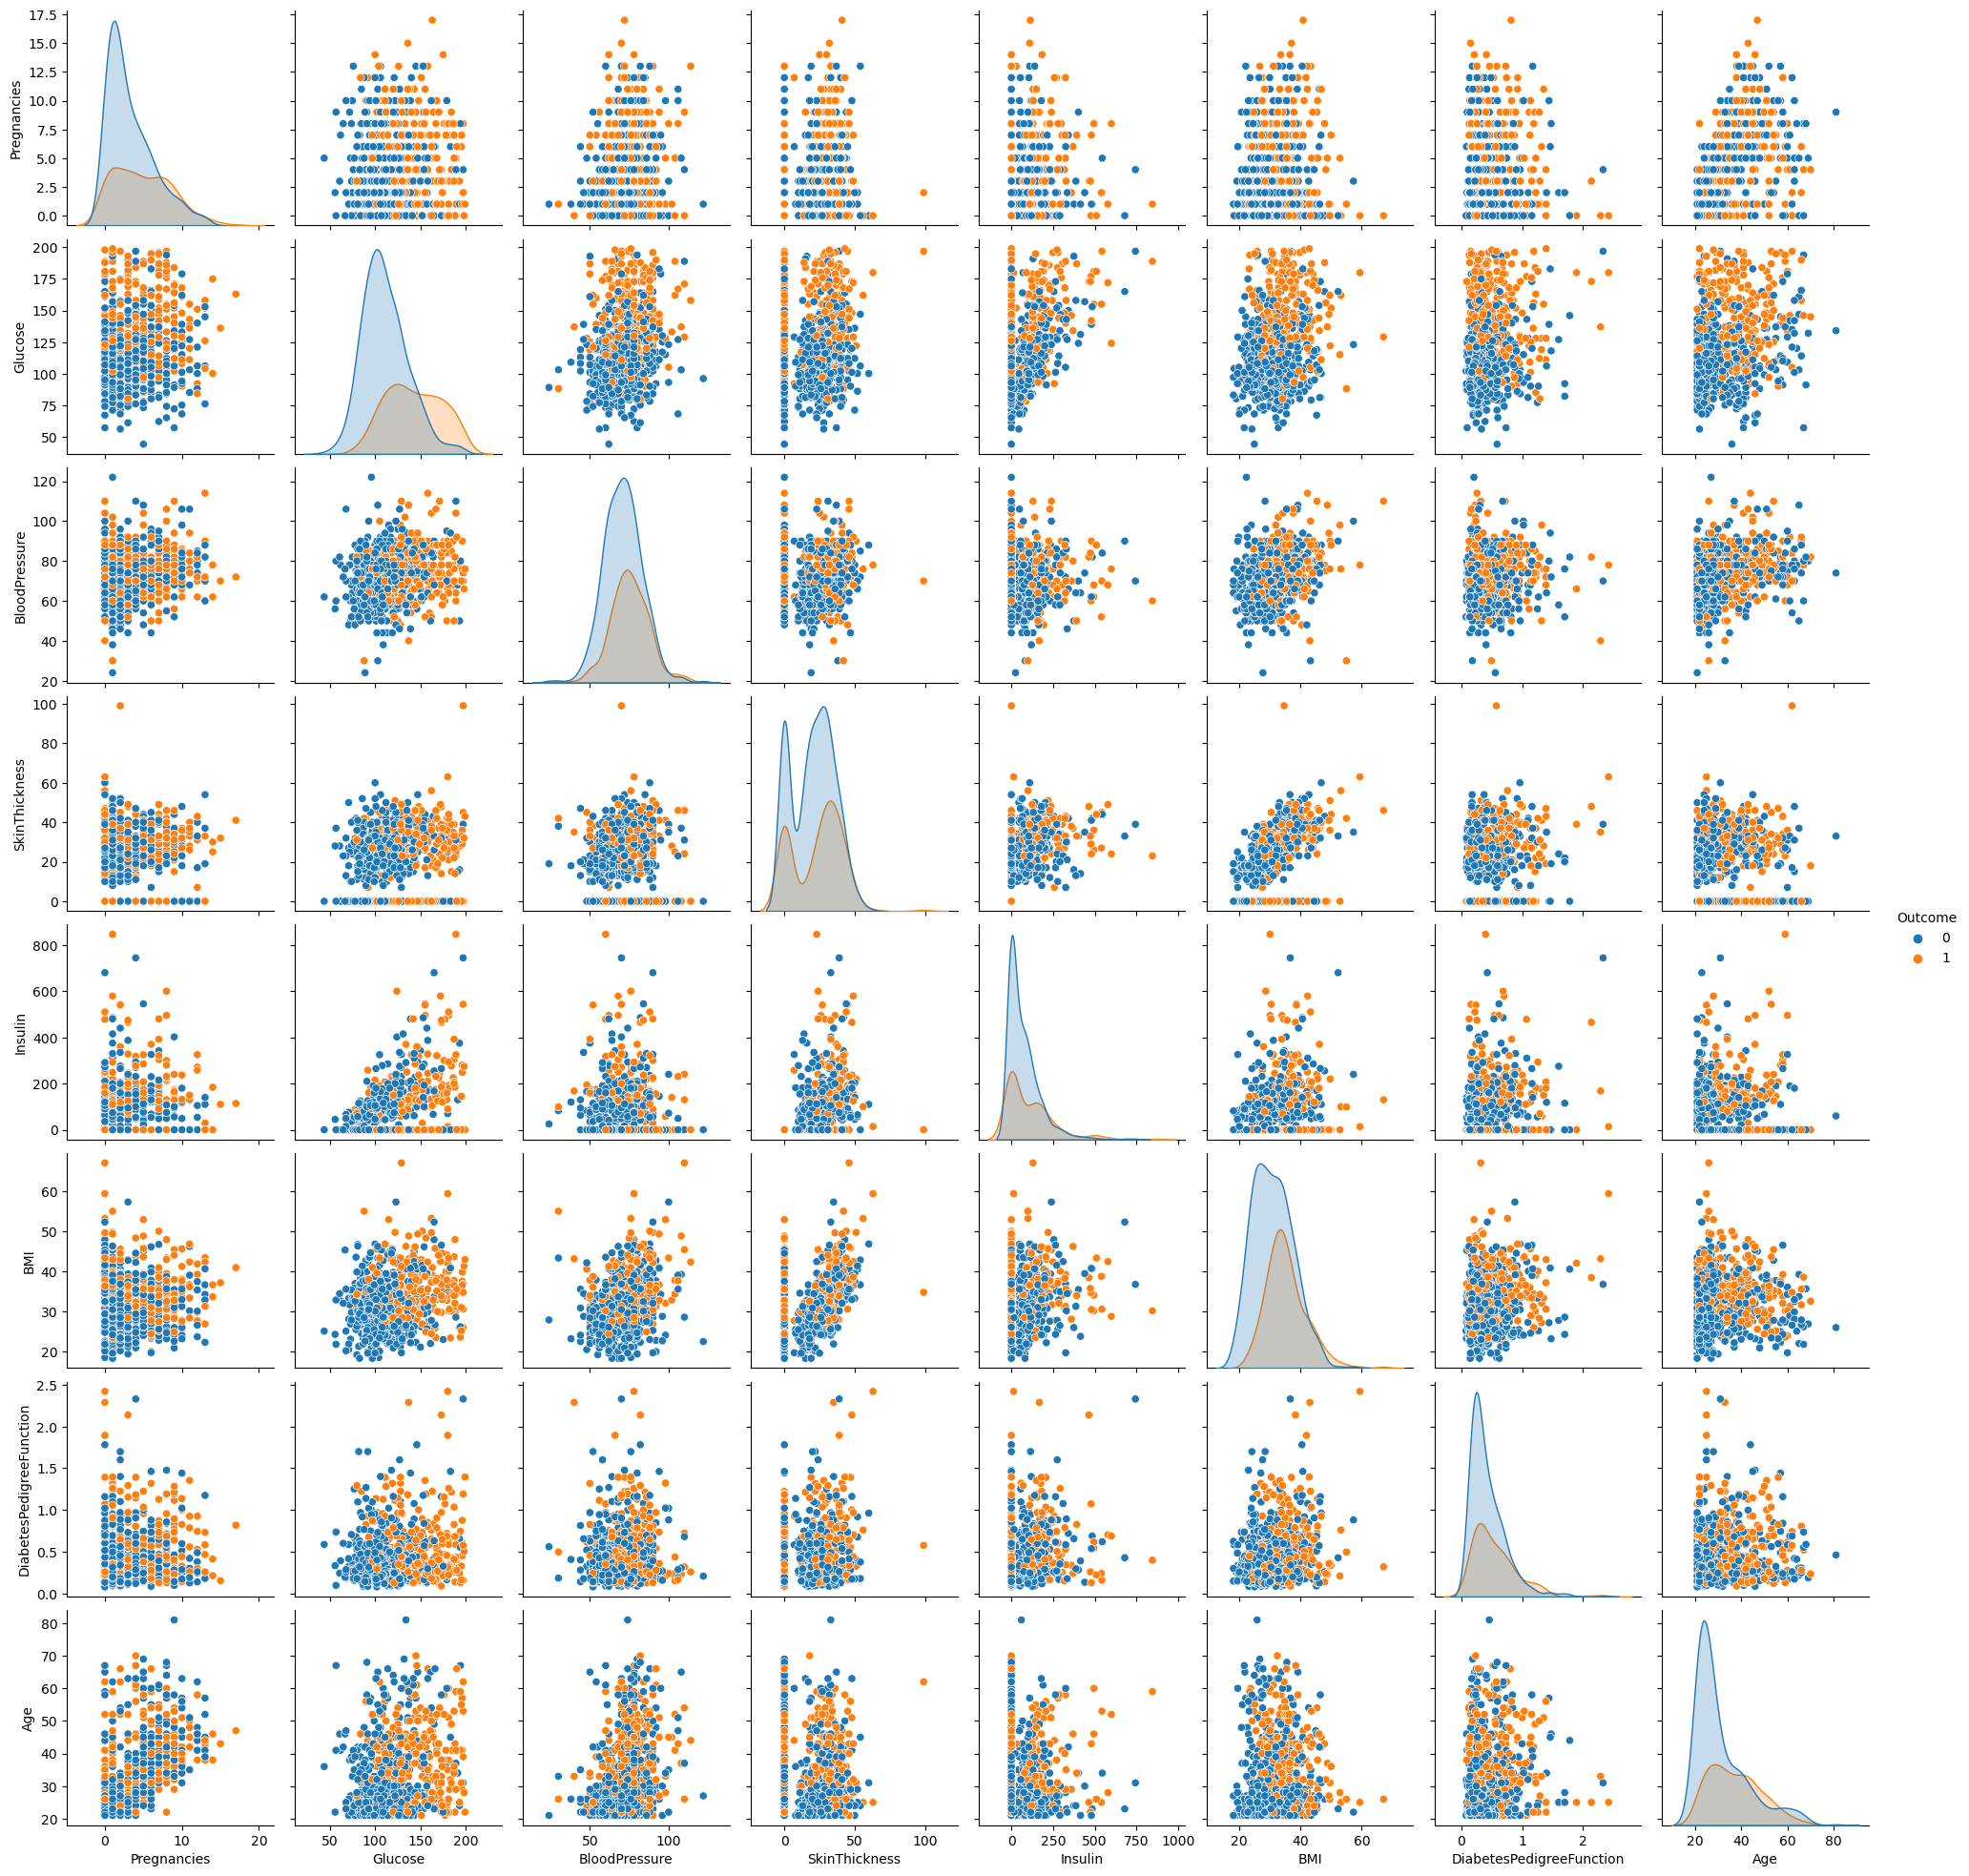

In [29]:
sns.pairplot(df, hue='Outcome')
plt.show()

Just as we have seen in the correlation heatmap, Glucose seems to show the best divide in outcomes both when paired with other variables and by itself. It would probably be the most significant predictor of the outcome in ML models.